### CNN on Fashion MNIST

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import scipy as sp
import tensorflow as tf
import tensorflow.keras as keras

### Loading data

In [2]:
    #loading data
(train_x, train_y), (test_x,test_y)= fashion_mnist.load_data()

In [3]:
#training data labels
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot

In [4]:
#np.arange(train_y.shape[0])[np.argmax(train_y, axis=1) == 1]

9

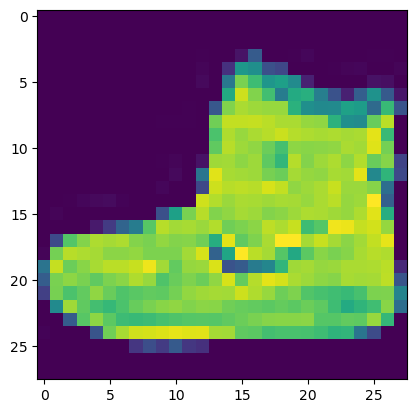

In [5]:
plt.imshow(train_x[0])
train_y[0]

In [6]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_x.shape

(60000, 28, 28)

In [8]:
test_x.shape

(10000, 28, 28)

In [9]:
test_x[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [10]:
train_x = train_x.reshape((60000, 28,28,1))  #training set with 60000 examples, 28x28 grayscale images,1 channel
test_x = test_x.reshape((10000, 28,28,1))  #test set with 10000 examples, 28x28 grayscale images, first layer--> single tensor


In [39]:
test_x.shape

(10000, 28, 28, 1)

In [40]:
test_x[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [41]:
train_x[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [14]:
#I am normalizing data-change pixel values to values from 0 to 1 

train_x = train_x / 255.0 
test_x = test_x / 255.0 

In [15]:
#I am converting to categorical data
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)


In [16]:
train_x[0]
test_x[0]


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Creating CNN model

In [17]:
from keras.models import Sequential,Model 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten


In [18]:
#I am defining model
#64= num of convolutions defined,size of conv network, relu function
model = Sequential() 
model.add(Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)))
model.add(MaxPooling2D((2,2)))  # 2 by 2 in. shape, 2x2 array of pixels and pick biggest val (4 pixels to 1) ==> across whole image==> reduce image shape 25% 
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(GlobalAveragePooling2D())
#model.add(Flatten()) #flatten input
#model.add(Dense(64, activation='relu')) #64 neurons/equations, relu keeps model nonlinear, values below 1 to 0
model.add(Dense(10, activation='softmax')) # 10 neurons defined in output layer


### Compiling model

In [19]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])  #one-hot encoded labels so categorical crossentropy, if were integers --> sparse
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0

### Fitting model

In [26]:
#I am compiling model
#import keras
#model = keras.models.load_model('current_model')

#fitting model
history = model.fit(train_x, train_y, epochs=10, batch_size=64, validation_data=(test_x,test_y)) #one epoch: one forward and one backward pass,

# use lr scheduling

# batchsize= number of training examples in forward backward pass
#model.save("current_model")

Epoch 1/10
938/938 [==============================] - 60s 64ms/step - loss: 0.2205 - accuracy: 0.9200 - val_loss: 0.2676 - val_accuracy: 0.9044
Epoch 2/10
938/938 [==============================] - 64s 68ms/step - loss: 0.2123 - accuracy: 0.9230 - val_loss: 0.2791 - val_accuracy: 0.8970
Epoch 3/10
938/938 [==============================] - 65s 69ms/step - loss: 0.2053 - accuracy: 0.9253 - val_loss: 0.2730 - val_accuracy: 0.9006
Epoch 4/10
938/938 [==============================] - 58s 62ms/step - loss: 0.1993 - accuracy: 0.9273 - val_loss: 0.2866 - val_accuracy: 0.8982
Epoch 5/10
938/938 [==============================] - 61s 65ms/step - loss: 0.1916 - accuracy: 0.9297 - val_loss: 0.2708 - val_accuracy: 0.9057
Epoch 6/10
938/938 [==============================] - 67s 72ms/step - loss: 0.1881 - accuracy: 0.9312 - val_loss: 0.2687 - val_accuracy: 0.9047
Epoch 7/10
938/938 [==============================] - 58s 62ms/step - loss: 0.1822 - accuracy: 0.9338 - val_loss: 0.2750 - val_accuracy:

In [ ]:
#print layers
for l in range(len(model.layers)):
    print(l, model.layers[l])

In [ ]:
#get features
getFeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[7].output])

In [ ]:
train_X = getFeature([X_train, 0])[0]
test_X = getFeature([X_test, 0])[0]

In [ ]:
test_X.shape

In [ ]:
train_X.shape

In [ ]:
from sklearn.svm import SVC
svmclf = SVC(C=10,kernel='rbf',gamma="auto",probability = True)
svmclf.fit(train_X,Y_train)

In [ ]:
Y_pred = svmclf.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

## Predicting google image

In [35]:
import cv2

#preprocessing image
def preprocess(image, image_size):
    img = tf.expand_dims(image, -1)       # from 28 x 28 to 28 x 28 x 1 
    img = tf.divide(img, 255)           # normalize
    img = tf.image.resize(img,          # resize acc to the input
             [image_size, image_size])
    img = tf.reshape(img,               # reshape to add batch dimension 
            [1, image_size, image_size, 1])
    return img

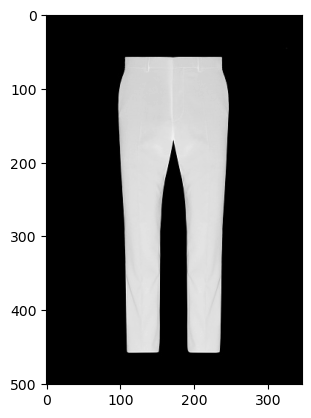

In [36]:
img = cv2.imread('test_img.jpg', 0)  #grayscale image
img = cv2.bitwise_not(img)

plt.imshow(img, cmap="gray")
plt.show()

img = preprocess(img, 28)  # call preprocess function 
#print(img.shape)   # (1, 28, 28, 1)

In [37]:
np.argmax(model.predict(img))

1

In [30]:
print(img)

tf.Tensor(
[[[[0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]

### Visualizing google image

In [43]:
# Display
from IPython.display import Image, display
import matplotlib.cm as cm

In [44]:
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_2"

# The local path to our target image
#img_path = keras.utils.get_file(
  #  "trouserimage2.jpg", "https://media.istockphoto.com/id/1301138253/photo/black-mens-classic-trousers.jpg?b=1&s=170667a&w=0&k=20&c=X2YDcLmiEWIwiFbO7uVkakBVJhKdZiimNJtZNese3D0= "
#)

#display(Image(img_path))

### Preprocessing google image

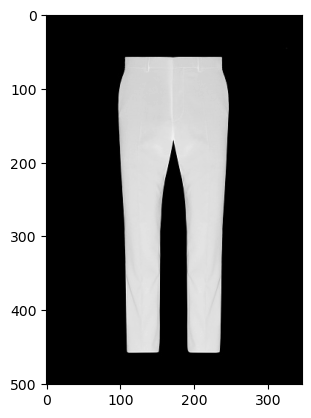

In [45]:
def preprocess(trouser_image, t_image_size):
    img = tf.expand_dims(trouser_image, -1)       # from 28 x 28 to 28 x 28 x 1 
    img = tf.divide(img, 255)           # normalize 
    img = tf.image.resize(img,          # resize acc to the input
             [t_image_size, t_image_size])
    img = tf.reshape(img,               # reshape to add batch dimension 
            [1, t_image_size, t_image_size, 1])
    return img

#img = image.load_img(img_path, target_size=(244,244)) #read image, resize image to 224,224
#img = image.img_to_array(img) #convert it into a tensor


img = cv2.imread('thumbnail_trouserimage2.jpg', 0)  #grayscale image
img = cv2.bitwise_not(img)

plt.imshow(img, cmap="gray")
plt.show()

img = preprocess(img, 28)  # call preprocess function 
#print(img.shape)   # (1, 28, 28, 1)


#img = preprocess(img,28) #np.expand_dims(img, axis=0) #expand in first axis to make it's shape (1,244,244,3)
#img = preprocess_input(img) #standard preprocessing

### Predicting google image with model

In [36]:
pred = svmclf.predict(img)
#print(decode_predictions(pred))
classIdx = np.argmax(pred)
svmclf.predict(img)
print(classIdx)

1


### Just getting layer names for first step of gradcam

In [48]:
from keras.preprocessing import image
from IPython.display import Image
import os

In [49]:
for layer in model.layers:
    print(layer.name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
global_average_pooling2d
dense


In [50]:
last_conv_layer_name = "conv2d_2"
classifier_layer_names = [
    "global_average_pooling2d",
    "dense"
]

### Just visualizing first step of gradcam // applied to image to create map

In [53]:
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)
    print(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


In [52]:
#help from https://github.com/y33-j3T/Coursera-Deep-Learning/blob/master/Advanced%20Computer%20Vision%20with%20TensorFlow/Week%204%20-%20Visualization%20and%20Interpretability/Copy%20of%20C3_W4_Lab_1_FashionMNIST-CAM.ipynb

[[-4.9086474e-08  1.7189245e-07  5.6134162e-08]
 [ 3.6590393e-08  1.1498041e-07  4.6311861e-08]
 [ 7.6974061e-08  1.0430965e-07  7.2921935e-08]]


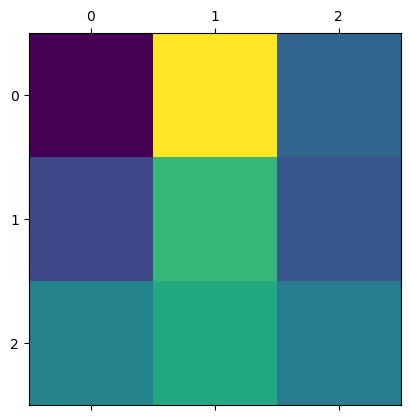

In [54]:
heatmap = make_gradcam_heatmap(
    img, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

### Implementing CAM on CNN model and google image

In [55]:
print(model.layers[-3].name)
#print(model.layers[-3].name)
print(model.layers[-1].name)
print(model.layers[-1].activation)

conv2d_2
dense
<function softmax at 0x000002CEADEB3A60>


### Creating CAM model

In [57]:
# creating cam model
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          3692

In [58]:
print(cam_model.layers[-1].activation)

<function softmax at 0x000002CEADEB3A60>


In [59]:
print(test_x.shape)
features,results = cam_model.predict(test_x)
print(results.shape)


print(features.shape)
print(results.shape)

(10000, 28, 28, 1)
(10000, 10)
(10000, 3, 3, 64)
(10000, 10)


In [57]:
print(results)

[[3.0574498e-09 4.1473945e-13 1.3486878e-09 ... 6.1449753e-03
  5.6214976e-08 9.9384457e-01]
 [2.6252987e-06 3.8098493e-11 9.9989909e-01 ... 2.0120278e-14
  4.8701537e-07 2.3413146e-10]
 [6.3079173e-09 9.9999994e-01 1.0560882e-10 ... 8.9629245e-14
  3.0227081e-08 7.2723320e-12]
 ...
 [7.0302036e-07 7.1005674e-13 5.8747471e-08 ... 1.3487411e-09
  9.9999911e-01 9.6046245e-14]
 [2.6387152e-09 9.9999994e-01 3.8579020e-09 ... 2.4180665e-16
  1.4146840e-12 1.5360357e-11]
 [3.9426923e-05 1.6144060e-07 1.9501323e-04 ... 7.4467152e-01
  9.2897750e-03 7.9623278e-04]]


In [61]:
last_dense = model.layers[-1]

last_dense_weights = last_dense.get_weights()

gap_weights = last_dense_weights[0]
print("gap_weights_l index 0 contains weights ", last_dense_weights[0].shape)
print("gap_weights_l index 1 contains biases ", last_dense_weights[1].shape)



gap_weights_l index 0 contains weights  (64, 10)
gap_weights_l index 1 contains biases  (10,)


In [59]:
# Get the features for the image at index 0
idx = 0
img_features = features[idx,:,:,:]

print(f"The features for image index {idx} has shape (height, width, num of feature channels) : ", img_features.shape)

The features for image index 0 has shape (height, width, num of feature channels) :  (3, 3, 64)


In [60]:
features_for_img_scaled = sp.ndimage.zoom(img_features, (28/3, 28/3,1), order=2) #scale features to original image hxw
print("features_for_img_scaled up to 28 by 28 height and width:", features_for_img_scaled.shape)

features_for_img_scaled up to 28 by 28 height and width: (28, 28, 64)


In [61]:
# Select the weights that are used for a specific class (0...9)
class_id = 0
# take the dot product between the scaled image features and the weights for 
gap_weights_for_one_class = gap_weights[:,class_id]

print("features_for_img_scaled has shape ", features_for_img_scaled.shape)
print("gap_weights_for_one_class has shape ", gap_weights_for_one_class.shape)
# take the dot product between the scaled features and the weights for one class
cam = np.dot(features_for_img_scaled, gap_weights_for_one_class)

print("class activation map shape ", cam.shape)

features_for_img_scaled has shape  (28, 28, 64)
gap_weights_for_one_class has shape  (64,)
class activation map shape  (28, 28)


### Getting image array

In [48]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.utils.load_img(img_path, target_size=size, grayscale=True)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.utils.img_to_array(img)
    array = cv2.bitwise_not(array)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    array = np.expand_dims(array, axis=-1)
    return array

### Show cam function

In [62]:
def show_cam(test_img,
             features_for_img,
             results):
  # get the class with the highest output probability
    prediction = np.argmax(results)

  # get the gap weights at the predicted class
    class_activation_weights = gap_weights[:, prediction]

  # upsample the features to the image's original size (28 x 28)
    class_activation_features = sp.ndimage.zoom(features_for_img, (28/3, 28/3, 1), order=2)

  # compute the intensity of each feature in the CAM
    cam_output  = np.dot(class_activation_features,class_activation_weights)
  
    print('Predicted Class = ' +str(prediction)+ ', Probability = ' + str(results[prediction]))
    #print('Probability = ' + str(results[prediction]))
  
  # show the upsampled image
    plt.imshow(np.squeeze(test_img), alpha=0.5)
  
  # strongly classified (95% probability) images will be in green, else red
    if results[prediction]>0.95:
        cmap_str = 'Greens'
    else:
        cmap_str = 'Reds'

  # overlay the cam output
    plt.imshow(cam_output, cmap=cmap_str, alpha=0.5)

  # display the image
    plt.show()


### Run show_cam with preprocessed google images

In [1]:
current_test_img = cv2.imread('trouserimage2.jpg', 0)  #grayscale image
current_test_img = cv2.bitwise_not(current_test_img)
# print(current_test_img.squeeze().shape)
# current_test_img = train_x[16]
# current_test_img = current_test_img[np.newaxis, :]
# print(current_test_img.shape)
# model.predict(current_test_img)
# print(current_test_img.squeeze().shape)
#test_img = preprocess(current_test_img.squeeze(), 28)
current_test_img = preprocess(current_test_img, 28)
print(current_test_img.shape)
features, results = cam_model.predict(current_test_img)
print(results)
show_cam(test_img=current_test_img,
         features_for_img=features.squeeze(axis=0),
         results=results.squeeze(axis=0))

NameError: name 'cv2' is not defined

In [ ]:
#training data labels
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot

In [ ]:
#CNN Accuracy Label wise
#Accuracy of T-shirt/Top: 86.80% 
#Accuracy of Trouser: 99.30% 
#Accuracy of Pullover: 89.03% 
#Accuracy of Dress: 97.57%   
#Accuracy of Coat: 88.78%  
#Accuracy of Sandal: 97.57% 
#Accuracy of Shirt: 82.42%  
#Accuracy of Sneaker: 97.27% 
#Accuracy of Bag: 99.48%     
#Accuracy of Ankle Boot: 98.83% 